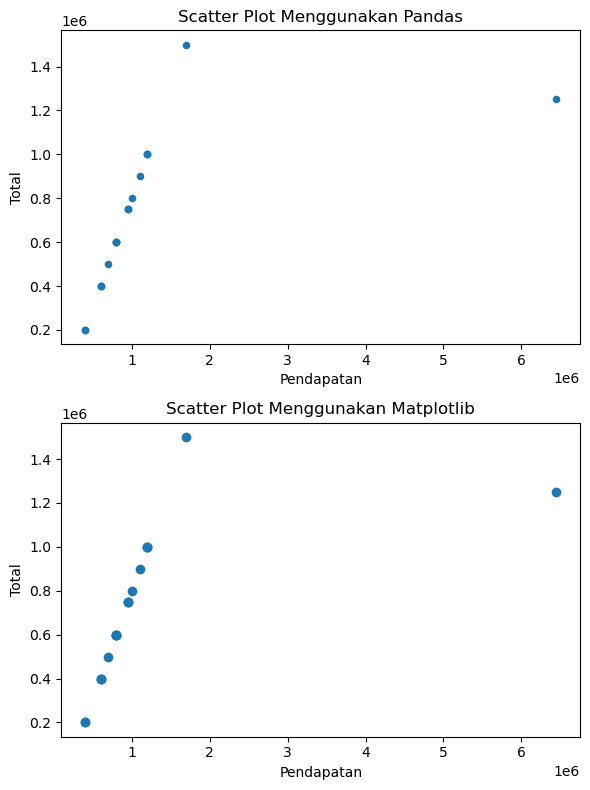

In [14]:
# Visualisasi Data : Diagram Pencar (Scatter Plot)
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dataset_statistic.csv",sep=";")
fig, ax = plt.subplots(2,figsize=(6,8))

# Plot menggunakan library Pandas
data.plot.scatter(x="Pendapatan",y='Total',ax=ax[0])
ax[0].set_title("Scatter Plot Menggunakan Pandas")

# Plot menggunakan library Matplotlib
ax[1].scatter(data["Pendapatan"],data["Total"])
ax[1].set_title("Scatter Plot Menggunakan Matplotlib")
ax[1].set_xlabel("Pendapatan")
ax[1].set_ylabel("Total")
plt.tight_layout()
plt.show()

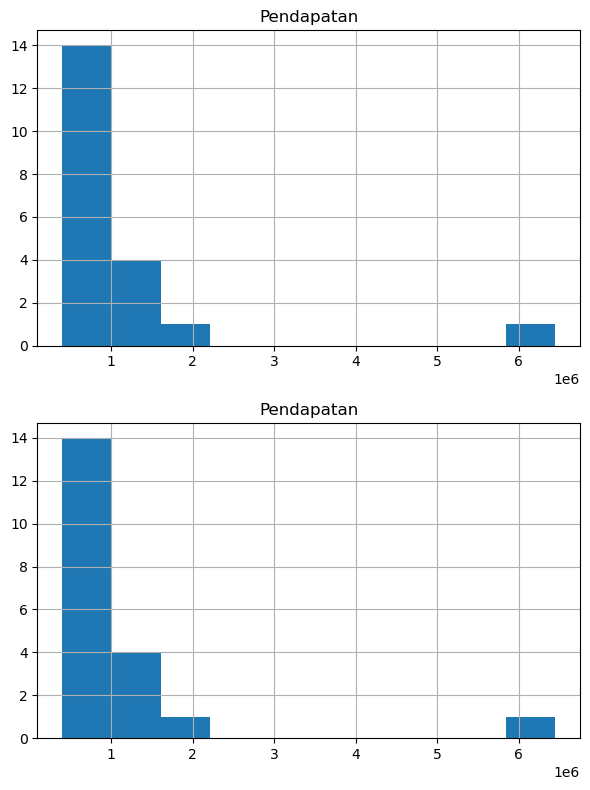

In [26]:
# Visualisasi Data : Histogram
fig, ax = plt.subplots(2,figsize=(6,8))
# menggunakan library Pandas
data.hist(column="Pendapatan",ax=ax[0])
# Menggunakan library Matplotlib
ax[1].hist(x=data["Pendapatan"])
ax[1].set_title("Pendapatan")
ax[1].grid()
plt.tight_layout()
plt.show()

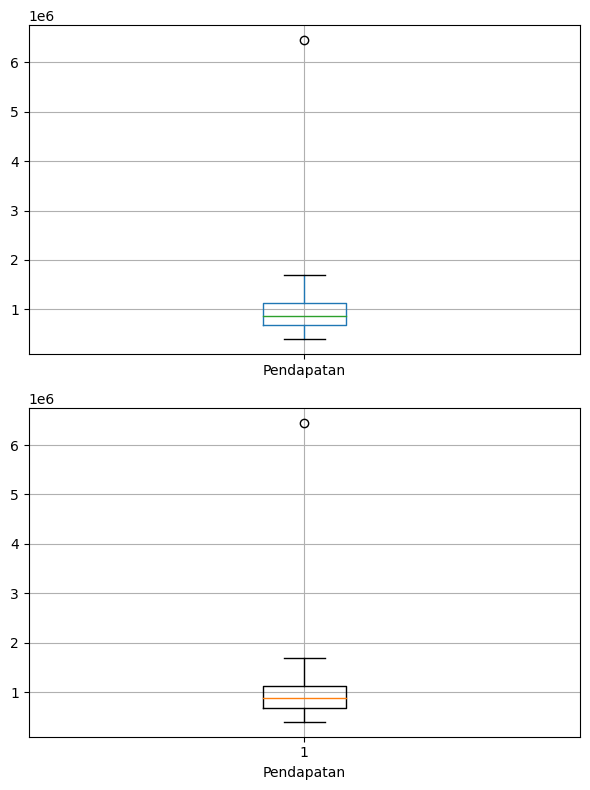

In [29]:
# Visualisasi Data : Boxplot
fig,ax = plt.subplots(2,figsize=(6,8))

# Menggunakan library Pandas
data.boxplot(column="Pendapatan",ax=ax[0])

# Menggunakan library Matplotlib
ax[1].boxplot(data["Pendapatan"])
ax[1].set_xlabel("Pendapatan")
ax[1].grid()
plt.tight_layout()
plt.show()

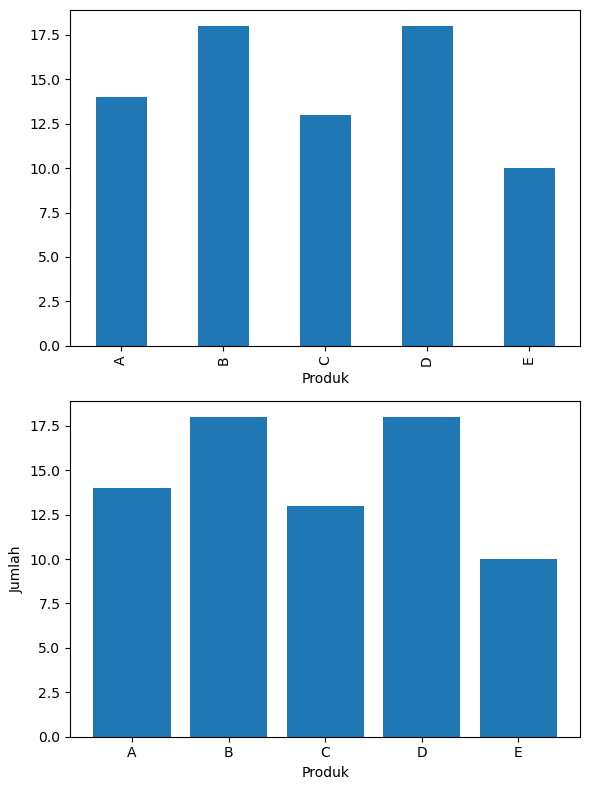

In [44]:
# Visualisasi Data : Diagram Batang
fig,ax = plt.subplots(2,figsize=(6,8))
df = data["Jumlah "].groupby(data["Produk"]).sum()
# Menggunakan library Pandas
df.plot.bar(ax=ax[0])

# Menggunakan library Matplotlib
ax[1].bar(df.index,df)
ax[1].set_xlabel("Produk")
ax[1].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()

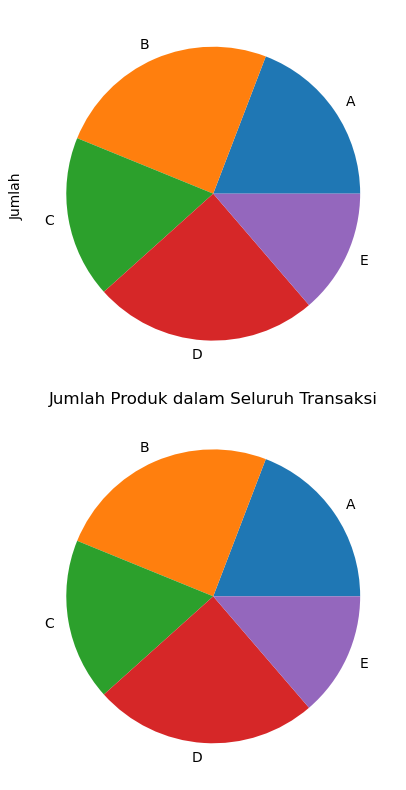

In [52]:
# Visualisasi Data : Pie Chart (Diagram Lingkaran)
fig, ax = plt.subplots(2,figsize=(6,8))
df = data["Jumlah "].groupby(data["Produk"]).sum()

# Menggunakan library Pandas
df.plot.pie(ax=ax[0])

# Menggunakan library Matplotlib
ax[1].pie(df,labels=df.index)
ax[1].set_title("Jumlah Produk dalam Seluruh Transaksi")
plt.tight_layout()
plt.show()

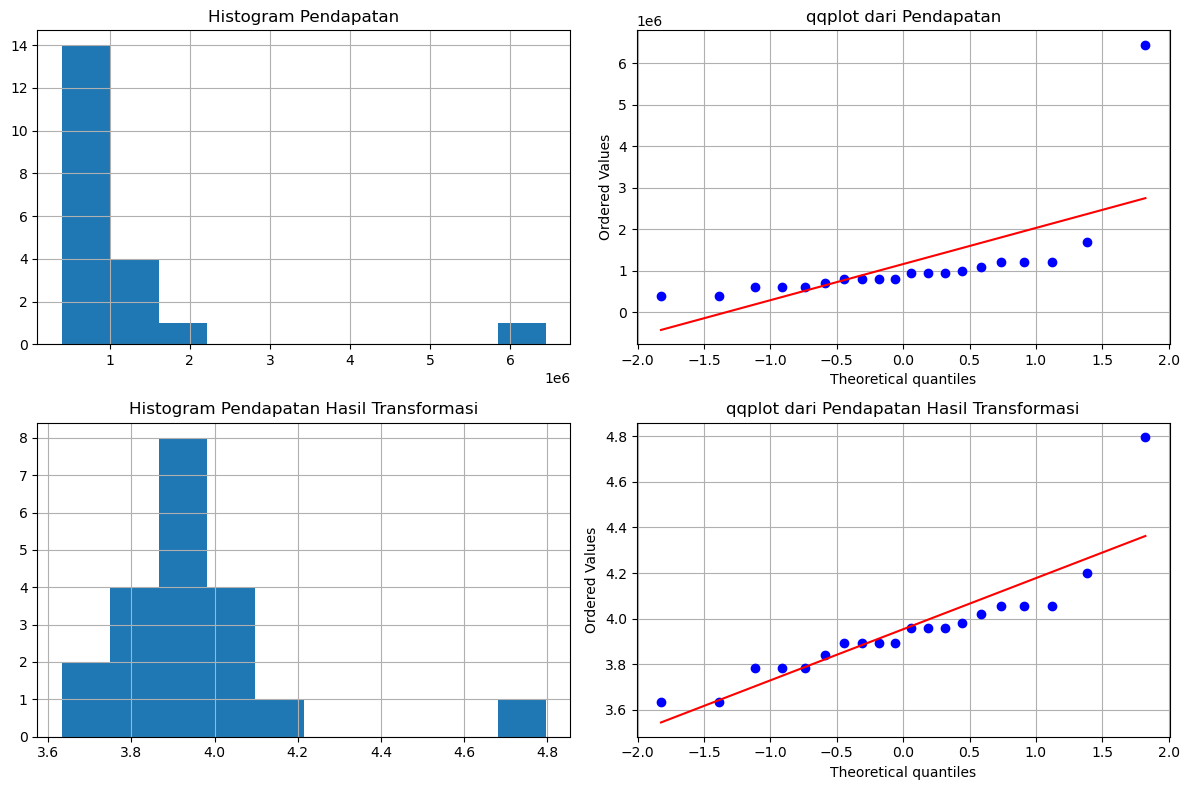

In [73]:
# Transformasi data : Mengubah data berdistribusi positif menjadi normal
from scipy.stats import probplot
import numpy as np
fig, ax = plt.subplots(2,2,figsize=(12,8))
# Dalam data kita, yang berdistribusi positif adalah data pada kolom Pendapatan
ax[0][0].hist(data["Pendapatan"])
ax[0][0].set_title("Histogram Pendapatan")
probplot(data["Pendapatan"],plot=ax[0][1])
ax[0][1].set_title("qqplot dari Pendapatan")

# Transformasi Data
df = data.copy()
df["Pendapatan"] = np.power(df["Pendapatan"],1/10) # Transformasi dengan menggunakan akar 10
ax[1][0].hist(df["Pendapatan"])
ax[1][0].set_title('Histogram Pendapatan Hasil Transformasi')
probplot(df["Pendapatan"],plot=ax[1][1])
ax[1][1].set_title("qqplot dari Pendapatan Hasil Transformasi")

for i in range(2) :
    for j in range(2) :
        ax[i][j].grid()
plt.tight_layout()
plt.show()

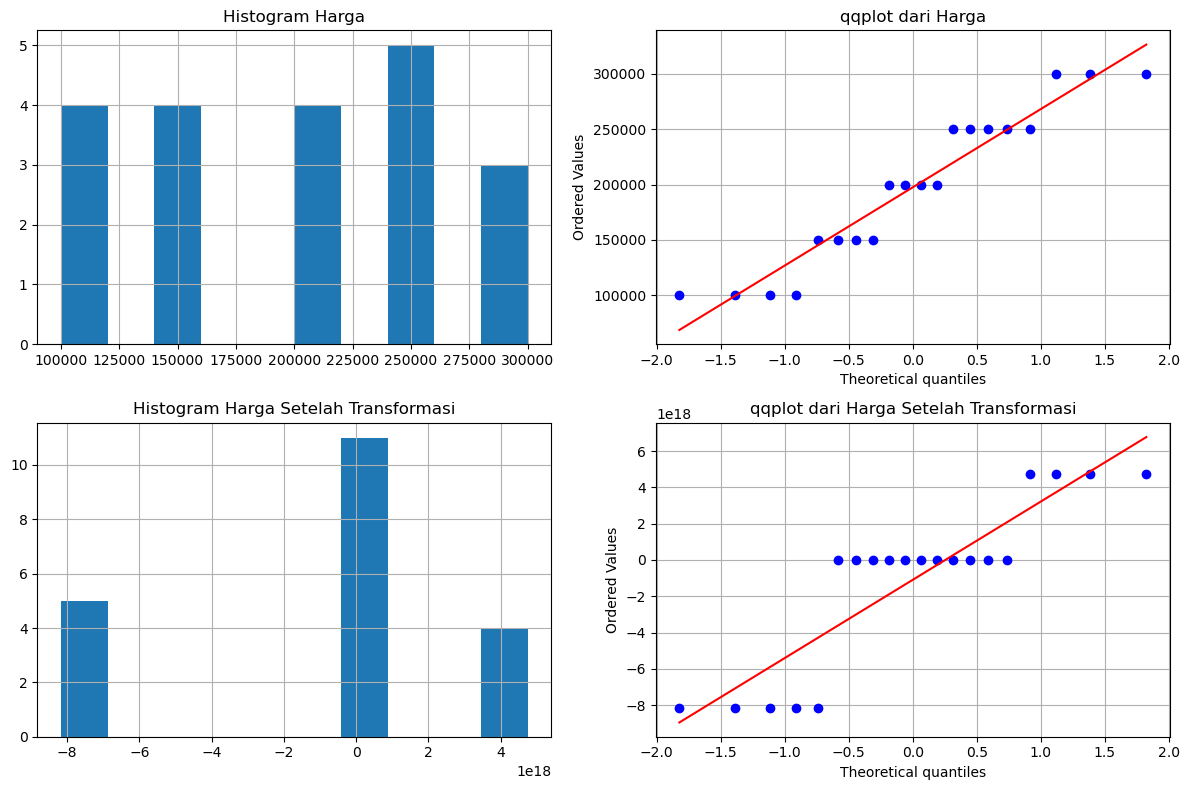

In [127]:
# Transformasi Data : Mengubah data berdistribusi Negatif menjadi Normal (Rasanya susah menemukan transformasi yang tepat :D)
fig,ax = plt.subplots(2,2,figsize=(12,8))

# Dalam data kita yang berdistribusi Negatif adalah kolom Harga
ax[0][0].hist(data["Harga"])
ax[0][0].set_title("Histogram Harga")
probplot(data["Harga"],plot=ax[0][1])
ax[0][1].set_title("qqplot dari Harga")

# Melakukan transformasi untuk kolom Harga
df = data.copy()
df["Harga"] = np.power(df["Harga"],13)
ax[1][0].hist(df["Harga"])
ax[1][0].set_title("Histogram Harga Setelah Transformasi")
probplot(df["Harga"],plot=ax[1][1])
ax[1][1].set_title("qqplot dari Harga Setelah Transformasi")
for i in range(2) :
    for j in range(2) :
        ax[i][j].grid()
plt.tight_layout()
plt.show()

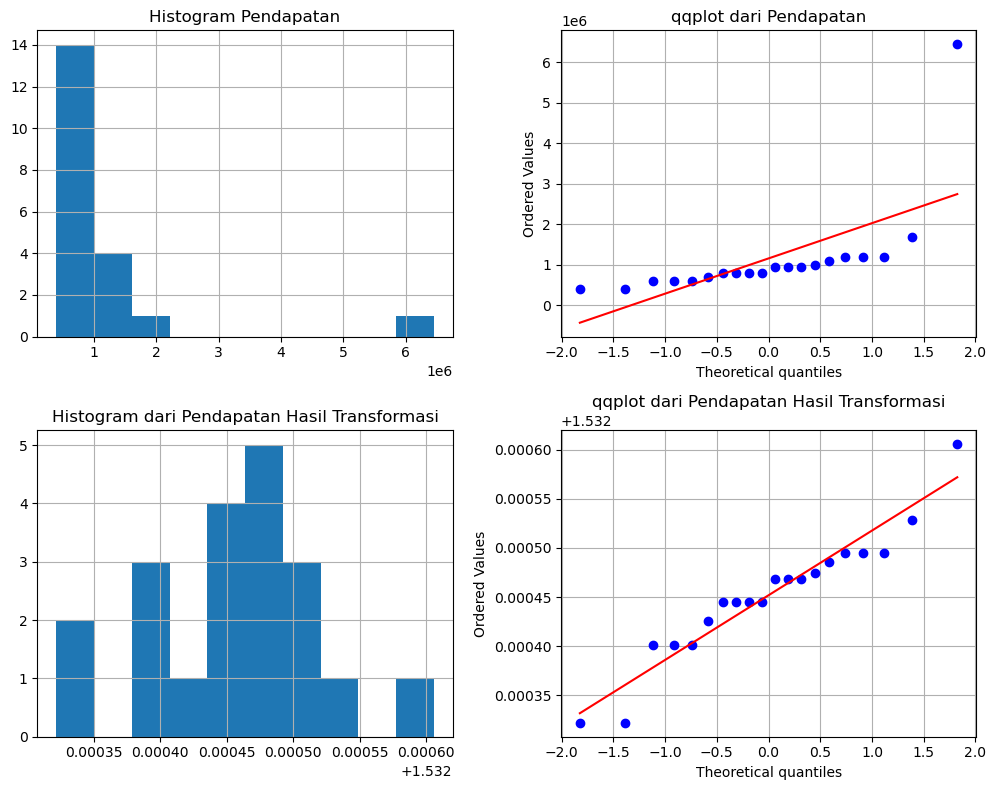

In [138]:
# Transformasi data otomatis : boxcox
from scipy.stats import boxcox

fig,ax = plt.subplots(2,2,figsize=(10,8))
# Kita akan coba menggunakan kolom Pendapatan 
ax[0][0].hist(data["Pendapatan"])
ax[0][0].set_title("Histogram Pendapatan")
probplot(data["Pendapatan"],plot=ax[0][1])
ax[0][1].set_title("qqplot dari Pendapatan")

# Transformasi otomatis menggunakan boxcox
df = data.copy()
df["Pendapatan"], _ = boxcox(df["Pendapatan"])
ax[1][0].hist(df["Pendapatan"])
ax[1][0].set_title("Histogram dari Pendapatan Hasil Transformasi")
probplot(df["Pendapatan"],plot=ax[1][1])
ax[1][1].set_title("qqplot dari Pendapatan Hasil Transformasi")
for i in range(2) :
    for j in range(2) :
        ax[i][j].grid()
plt.tight_layout()
plt.show()

In [141]:
# Transformasi Data Kategorik ke dalam Angka (One Hot Encoding)
print(data["Produk"])
transformasi = pd.get_dummies(data["Produk"])
transformasi

0     A
1     D
2     D
3     A
4     D
5     B
6     B
7     E
8     E
9     E
10    A
11    B
12    C
13    D
14    C
15    B
16    C
17    D
18    A
19    C
Name: Produk, dtype: object


,A,B,C,D,E
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,1,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


C:\Users\zulfi\AppData\Local\Temp\ipykernel_17392\2102771567.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax[0].matshow(data.corr())
C:\Users\zulfi\AppData\Local\Temp\ipykernel_17392\2102771567.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,ax=ax[1])


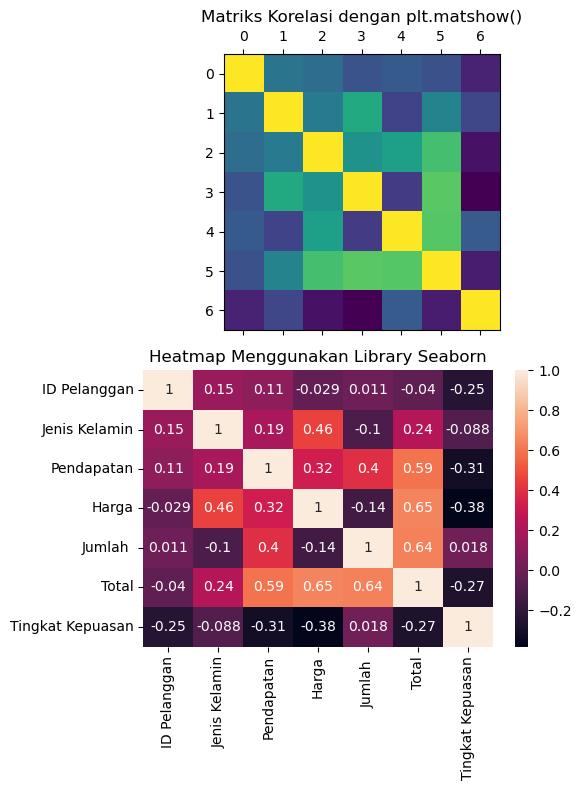

In [8]:
# Matriks Korelasi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dataset_statistic.csv",sep=";")
fig, ax = plt.subplots(2,figsize=(6,8))
plt.rcParams['figure.dpi'] = 100

# Visualisasi Matriks Korelasi menggunakan library Matplotlib
ax[0].matshow(data.corr())
ax[0].set_title("Matriks Korelasi dengan plt.matshow()")

# Visualisasi Heatmap Menggunakan library Seaborn
sns.heatmap(data.corr(),annot=True,ax=ax[1])
ax[1].set_title("Heatmap Menggunakan Library Seaborn")

plt.tight_layout()
plt.show()


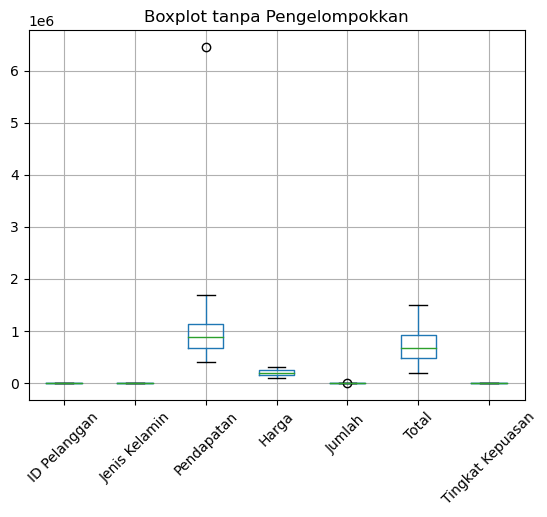

<Figure size 640x480 with 0 Axes>

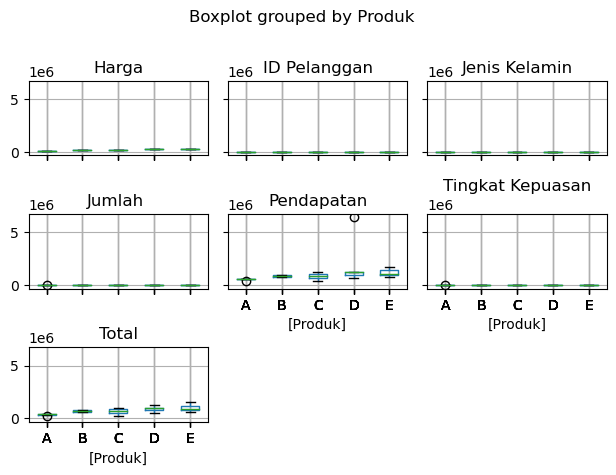

In [20]:
# Visualisasi Data : Grouped Boxplot

# Boxplot tanpa pengelompokkan

plt.figure()
data.boxplot(rot=45)
plt.title("Boxplot tanpa Pengelompokkan")

# Boxplot dengan Pengelompokkan
plt.figure()
data.boxplot(by="Produk")
plt.title("Boxplot dengan Pengelompokkan terhadap Produk")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

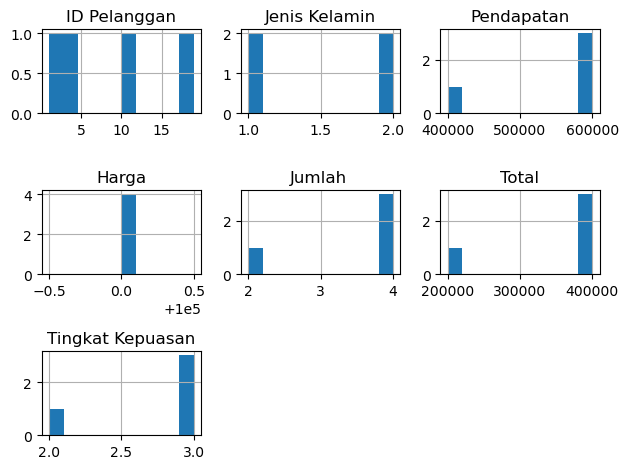

<Figure size 640x480 with 0 Axes>

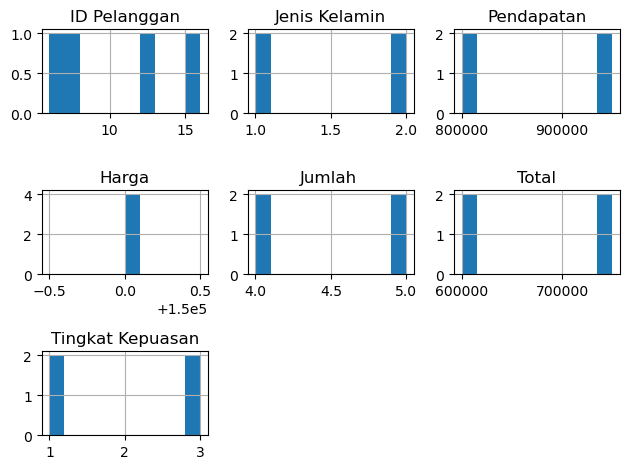

<Figure size 640x480 with 0 Axes>

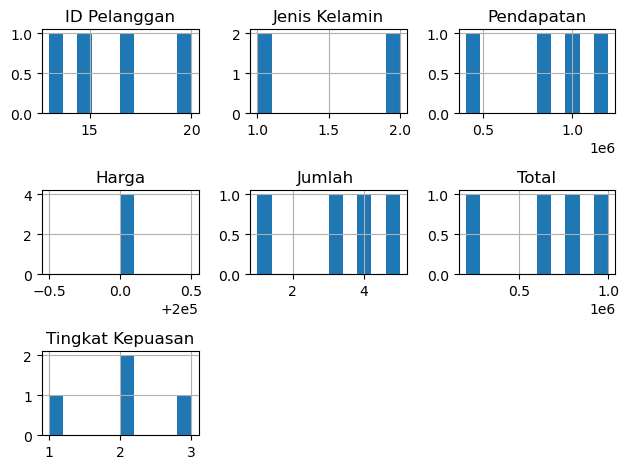

<Figure size 640x480 with 0 Axes>

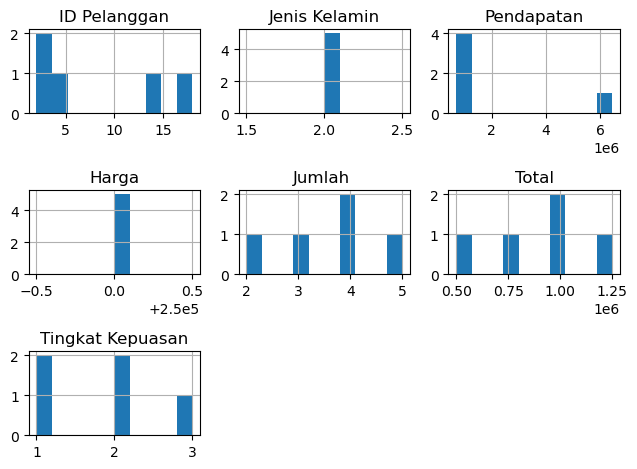

<Figure size 640x480 with 0 Axes>

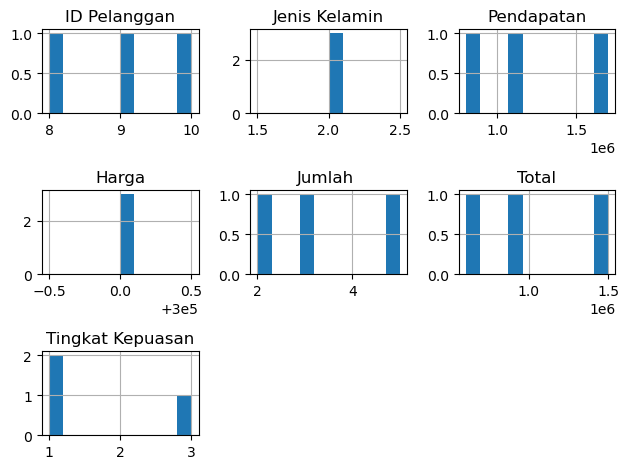

In [25]:
# Visualisasikan Data : Grouped Histogram
plt.figure()
data[data["Produk"]=="A"].hist()
plt.tight_layout()
plt.show()

plt.figure()
data[data["Produk"]=="B"].hist()
plt.tight_layout()
plt.show()

plt.figure()
data[data["Produk"]=="C"].hist()
plt.tight_layout()
plt.show()

plt.figure()
data[data["Produk"]=="D"].hist()
plt.tight_layout()
plt.show()

plt.figure()
data[data["Produk"]=="E"].hist()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

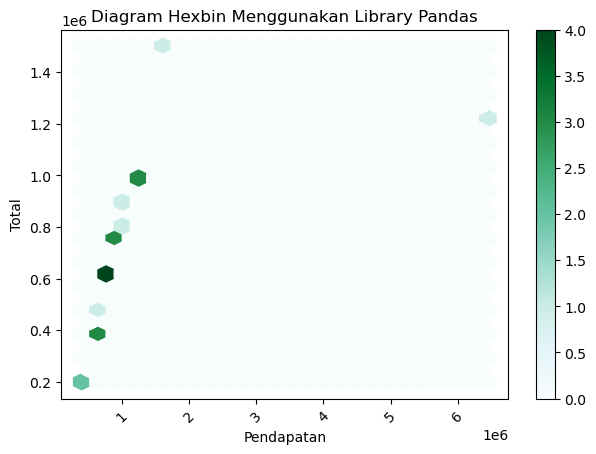

In [30]:
# Visualisasi Data : Hex Bin Plot
plt.figure()
data.plot.hexbin(x="Pendapatan",y="Total",gridsize=25,rot=45)
plt.title("Diagram Hexbin Menggunakan Library Pandas")
plt.tight_layout()
plt.show()

C:\Users\zulfi\AppData\Local\Temp\ipykernel_17392\3900807227.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(data,ax=ax,diagonal="kde")


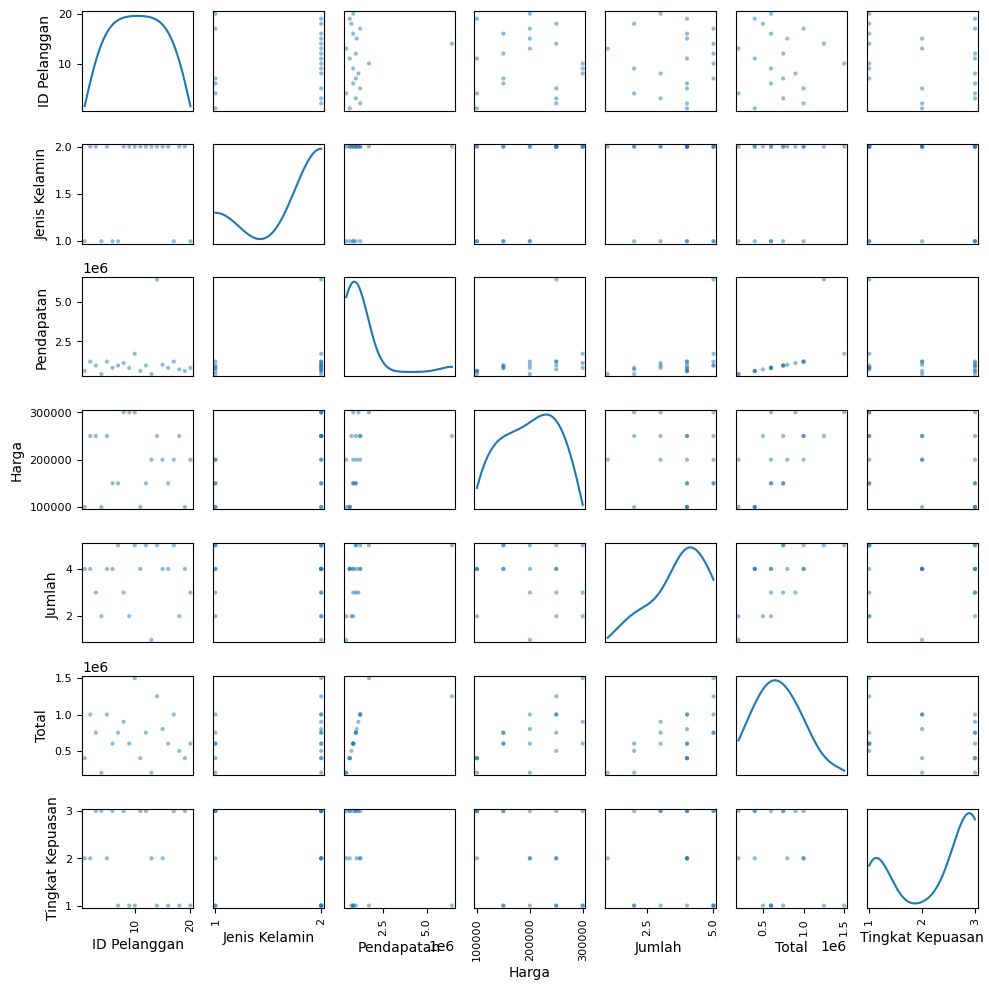

In [35]:
# Visualisasi Data : Scatter Matrix
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(1,1,figsize=(10,10))
scatter_matrix(data,ax=ax,diagonal="kde")
plt.tight_layout()
plt.show()

In [19]:
# Membuat regresi linear sederhana
import pandas as pd
import statsmodels.api as sm
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dataset_statistic.csv",sep=";")
nilai_Y = data[["Total"]]
nilai_X = data[["Pendapatan"]]
model_regresi = sm.OLS(endog=nilai_Y,exog=nilai_X).fit()
print(model_regresi.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Total   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.620
Method:                 Least Squares   F-statistic:                              33.57
Date:                Thu, 20 Jul 2023   Prob (F-statistic):                    1.39e-05
Time:                        21:49:45   Log-Likelihood:                         -289.57
No. Observations:                  20   AIC:                                      581.1
Df Residuals:                      19   BIC:                                      582.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
# Membuat regresi linear sederhana part 2
import pandas as pd
import statsmodels.api as sm
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dataset_statistic.csv",sep=";")
nilai_Y = data[["Total"]]
nilai_X = sm.add_constant(data[["Pendapatan"]])
model_regresi = sm.OLS(endog=nilai_Y,exog=nilai_X).fit()
print(model_regresi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9.714
Date:                Thu, 20 Jul 2023   Prob (F-statistic):            0.00596
Time:                        21:51:38   Log-Likelihood:                -277.92
No. Observations:                  20   AIC:                             559.8
Df Residuals:                      18   BIC:                             561.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.313e+05   8.43e+04      6.300      0.0

Sumber Belajar : www.dqlab.id